In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.optimize import fsolve
import scipy.interpolate as interpolate
from scipy import integrate
from scipy.misc import derivative
import random
#from pynverse import inversefunc

In [2]:
print(tck1)

NameError: name 'tck1' is not defined

In [3]:

t = t1
c = c1
k = k1
for i in range(1,8):
    c1[i] = 10*random.random()
    c2[i] = 10*random.random()
print(c)

spl = BSpline(t,c,k)
aa = np.array([ 0. ,  1,  2,  3,  4 , 5, 6])



tt = [0,8]
x = [-4,4]
ttt = np.linspace(0,8,100)
fig, ax = plt.subplots()
ax.plot(ttt, spl(ttt), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.plot(tt,x,'.r')
plt.show()

NameError: name 't1' is not defined

In [4]:
for i in range(1,8):
    c1[i] = 10*random.random()
    c2[i] = 10*random.random()
print(c1)
y = [-1,6]
spl1 = BSpline(t1, c1, k1)
spl2 = BSpline(t2, c2, k2)
fig, ax = plt.subplots()
xx = np.linspace(-7, 7, 50)
ax.plot(spl1(ttt), spl2(ttt), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.plot(x,y,'.r')
ax.grid(True)
ax.legend(loc='best')
plt.show()

NameError: name 'c1' is not defined

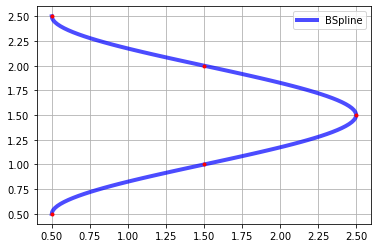

In [5]:
af = 6
ttt = np.linspace(0,10,100)
aa =  np.linspace(0,10,5)
x = np.array([  0.5,1.5,2.5,1.5,0.5])#,2.5,0.5,2.5])
y = np.array([  0.5,1  ,1.5,2  ,2.5])#,1.7,2.1,2.5])
tck1 = interpolate.splrep(aa, x)#, s=0, k=3)
tck2 = interpolate.splrep(aa, y)#, s=0, k=3)
t1, c1, k1 = interpolate.splrep(aa, x)#, s=0, k=3)
t2, c2, k2 = interpolate.splrep(aa, y)#, s=0, k=3)

spl1 = BSpline(t1, c1, k1)
spl2 = BSpline(t2, c2, k2)
#spl(2.5)
#bspline(2.5, t, c, k)
fig, ax = plt.subplots()
xx = np.linspace(-7, 7, 50)
#ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
#ax.plot(spl1(ttt), spl2(ttt), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.plot( interpolate.splev(ttt,tck1),  interpolate.splev(ttt,tck2), 'b-', lw=4, alpha=0.7, label='BSpline')
#ax.plot( ttt,  interpolate.splev(ttt,tck1), 'r-', lw=4, alpha=0.7, label='BSpline1')
#ax.plot( ttt,  interpolate.splev(ttt,tck2), 'b-', lw=4, alpha=0.7, label='BSpline2')
ax.plot(x,y,'.r')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [205]:
x

array([0.5, 1. , 5. , 2.5, 1.5, 0.5])

In [194]:
#a는 그냥 매개변수, t가 아님!

def splfun(a):
    x = interpolate.splev(a,tck1)
    y = interpolate.splev(a,tck2)
    return x,y


def splder(a):
    #def x(a):
    #    return interpolate.splev(a,tck1)
    #def y(a):
    #    return interpolate.splev(a,tck2)
    #dx = derivative(x,a,dx=1e-6)
    #dy = derivative(y,a,dx=1e-6)
    
    dx = interpolate.splev(a,tck1,der=1)
    dy = interpolate.splev(a,tck2,der=1)
    return dx,dy
def lenfun(a):
    dx,dy = splder(a)
    dl = np.sqrt(dx**2+dy**2)
    return dl
def len_int(a):
    length = integrate.quad(lenfun,0,a)[0]
    return length
def len_inv(length):
    inv = inversefunc(spl1)
    a = inv(length)
    return a
    
T = 5
delta = 0.6
deltaT = delta*T

In [195]:
splder(3)

(-0.8124999997249915, 4.722916667532218)

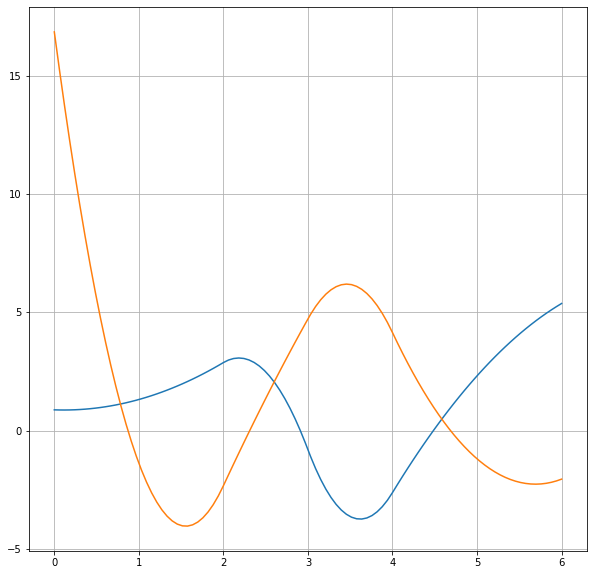

In [238]:
def ddx(a):
    dx = interpolate.splev(a,tck1,der=1)
    return dx
def ddy(a):
    dy = interpolate.splev(a,tck2,der=1)
    return dy
dy = ddy(tt)
fig, ax = plt.subplots()
ax.plot(ttt,ddx(ttt))
ax.plot(ttt,ddy(ttt))
ax.grid(True)
#ax.legend(loc='best')
plt.show()

In [239]:
print(ddy(ttt))

[16.86488095 15.26666503 13.73197396 12.26080775 10.8531664   9.50904991
  8.22845828  7.01139151  5.8578496   4.76783255  3.74134035  2.77837302
  1.87893054  1.04301292  0.27062016 -0.43824774 -1.08359078 -1.66540896
 -2.18370228 -2.63847075 -3.02971435 -3.3574331  -3.62162698 -3.82229601
 -3.95944018 -4.03305949 -4.04315394 -3.98972353 -3.87276827 -3.69228814
 -3.44828316 -3.14075331 -2.76969861 -2.33511905 -1.87111537 -1.41178834
 -0.95713794 -0.50716417 -0.06186705  0.37875344  0.8146973   1.24596452
  1.6725551   2.09446904  2.51170635  2.92426702  3.33215106  3.73535845
  4.13388922  4.52774334  4.91107668  5.24882428  5.535142    5.77002984
  5.9534878   6.08551587  6.16611406  6.19528237  6.17302079  6.09932933
  5.97420799  5.79765676  5.56967565  5.29026466  4.95942378  4.57715302
  4.14345238  3.69226518  3.25753476  2.83926112  2.43744425  2.05208415
  1.68318083  1.33073429  0.99474452  0.67521153  0.37213531  0.08551587
 -0.18464679 -0.43835268 -0.6756018  -0.89639414 -1

In [240]:
#####1. total length calculation
total_length = integrate.quad(lenfun,0,6)[0]
print(total_length,len_int(3))
len_int(3)
len_inv(13.91698)

26.857951930674172 13.916981517156653


/home/robotics/anaconda3/envs/py3_bhl/lib/python3.6/site-packages/pynverse/inverse.py:196: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  % accuracy, RuntimeWarning)


array(2.90945785)

In [241]:
####2. max_speed calculation
max_speed = (total_length/
                     (T + -1/((1-delta)*(1-delta)*T*T*3)*(T-deltaT)*(T-deltaT)*(T-deltaT)))

In [242]:
#V와 l의 t는 진짜 t!

def V(t):
    speed = np.zeros(t.shape)
    speed[t<=deltaT] = max_speed
    speed[t>deltaT] = -(max_speed)/((1-delta)*(1-delta)*T*T)*(t[t>deltaT]-deltaT)*(t[t>deltaT]-deltaT) + max_speed
    return speed
def l(t):
    distance = np.zeros(t.shape)
    distance[t<=deltaT] = max_speed*t[t<=deltaT]
    distance[t>deltaT] = (max_speed*t[t>deltaT] + -(max_speed)/((1-delta)*(1-delta)*T*T*3)*
                          (t[t>deltaT]-deltaT)*(t[t>deltaT]-deltaT)*(t[t>deltaT]-deltaT))
    #if t<=deltaT:
    #    distance = max_speed*t
    #else:
    #    distance = (max_speed*t + -(max_speed)/((1-delta)*(1-delta)*T*T*3)*
    #                (t-deltaT)*(t-deltaT)*(t-deltaT))
    

In [243]:
t_total = np.linspace(0,T,100)
lt = l(t_total)

In [247]:
#### 3. matching t vs x,y

def xy_at_t(t):
    #3-1. t vs l(t)
    lt = l(t)
    #3-2. l(t) vs a
    def len_res(a): 
        return len_int(a)-lt
    a = fsolve(len_res,(t*af/T))
    x,y = splfun(a)
    return a,x,y

xx = np.zeros([100])
yy = np.zeros([100])
aa = np.zeros([100])
for i in range(100):
    aa[i], xx[i],yy[i] = xy_at_t(t_total[i])


In [249]:
print(aa)

[0.         0.01881659 0.03822481 0.05827551 0.07902705 0.10054691
 0.12291386 0.14622066 0.17057788 0.19611892 0.22300719 0.25144638
 0.28169568 0.31409325 0.34909425 0.3873357  0.42975628 0.47783998
 0.53418658 0.60416951 0.70305274 0.90197178 1.07316004 1.18271103
 1.27247958 1.3524877  1.426924   1.49809095 1.56750644 1.63633244
 1.70558766 1.77628028 1.84950861 1.92652948 2.00870204 2.09700736
 2.1917724  2.29298332 2.39989338 2.51015149 2.61920617 2.72169501
 2.8142583  2.89640139 2.96925217 3.03436572 3.09354874 3.14842937
 3.20012654 3.24942641 3.29690558 3.34300597 3.38808112 3.43242659
 3.47630061 3.5199394  3.56356966 3.60741993 3.65173244 3.69677725
 3.74286904 3.79036356 3.83970274 3.89150711 3.94671044 4.00685161
 4.07442866 4.15305905 4.25025507 4.3895935  4.69749409 4.88777044
 5.00901183 5.10572852 5.18864281 5.2622795  5.32902943 5.39032338
 5.44708733 5.49995287 5.54936646 5.59565131 5.63904491 5.67972272
 5.7178141  5.7534132  5.78658667 5.81737924 5.84581795 5.8719

In [250]:
#### 4. asigning speed to the spline
dx,dy = splder(aa)
#dx = np.ones([100])
#dy = dydt/dxdt
dx_normalized = dx/np.sqrt(dx**2+dy**2)
dy_normalized = dy/np.sqrt(dx**2+dy**2)
dx_f = dx_normalized*V(t_total)
dy_f = dy_normalized*V(t_total)

(100,) (100,) (100,) (100,)


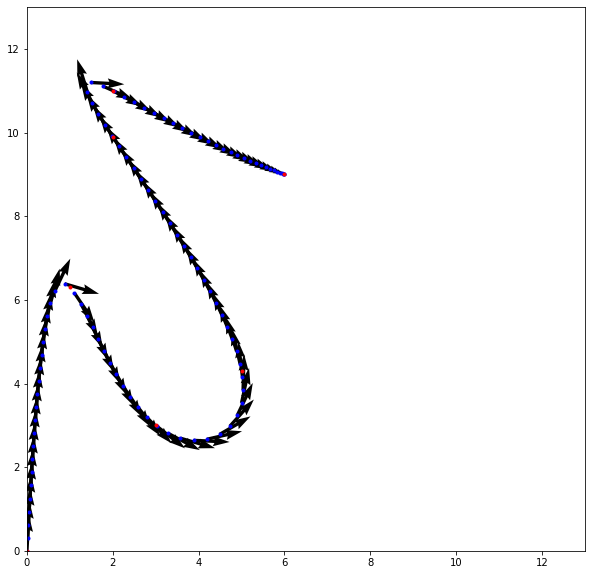

In [252]:

plt.rcParams["figure.figsize"] = (10,10)
plt.axis([0, 13, 0, 13])
plt.plot(xx,yy,'b.')
plt.plot(x,y,'r.')
plt.quiver(xx,yy,dx_f,dy_f)
